In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [52]:
path = 'Data_Features/'
folder = 'lopen_1'

In [53]:
mode  = folder.split('_')[0]

df_acc = pd.read_csv(f'{path}{folder}/Accelerometer.csv')
df_gyro = pd.read_csv(f'{path}{folder}/Gyroscope.csv')
df_lin_acc = pd.read_csv(f'{path}{folder}/Linear Accelerometer.csv')

acc_columns = df_acc.columns
gyro_columns = df_gyro.columns
linacc_columns = df_lin_acc.columns
pca_columns = df_lin_acc.filter(regex='^pca\d+$').columns

In [54]:
df_lin_acc

,Time (s),X,Y,Z,temp_X_mean,temp_X_std,temp_X_median,temp_X_sum,temp_X_skew,temp_X_kurt,...,X_spectral_energy,X_spectral_entropy,Y_fft,Y_dominant_freq,Y_spectral_energy,Y_spectral_entropy,Z_fft,Z_dominant_freq,Z_spectral_energy,Z_spectral_entropy
0,10.252582,0.595320,-0.130685,-0.228172,NaN,NaN,NaN,NaN,NaN,NaN,...,356203.798232,-41889.509654,184.319211,0,437967.07589,-39856.146074,39.034200,535,397876.903807,-47911.932697
1,10.750096,0.127888,-0.020139,0.032527,NaN,NaN,NaN,NaN,NaN,NaN,...,356203.798232,-41889.509654,13.635775,0,437967.07589,-39856.146074,14.967565,535,397876.903807,-47911.932697
2,11.247610,0.491270,-0.408075,0.068320,NaN,NaN,NaN,NaN,NaN,NaN,...,356203.798232,-41889.509654,5.588992,0,437967.07589,-39856.146074,12.700881,535,397876.903807,-47911.932697
3,11.750591,-0.349713,0.137229,0.305648,NaN,NaN,NaN,NaN,NaN,NaN,...,356203.798232,-41889.509654,14.425560,0,437967.07589,-39856.146074,9.275683,535,397876.903807,-47911.932697
4,12.253572,-0.615994,-0.121403,-0.526880,NaN,NaN,NaN,NaN,NaN,NaN,...,356203.798232,-41889.509654,22.412171,0,437967.07589,-39856.146074,8.370980,535,397876.903807,-47911.932697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,569.252320,0.061579,0.437854,0.194341,-0.034731,0.389390,-0.034777,-0.347310,0.215255,0.250669,...,356203.798232,-41889.509654,14.075275,0,437967.07589,-39856.146074,13.969175,535,397876.903807,-47911.932697
1119,569.749872,0.214189,-0.187846,-0.832665,0.047123,0.339136,0.044624,0.471227,0.114225,1.097033,...,356203.798232,-41889.509654,22.412171,0,437967.07589,-39856.146074,8.370980,535,397876.903807,-47911.932697
1120,570.247423,-0.565614,0.453365,0.097826,-0.033375,0.381344,-0.034777,-0.333753,0.291044,0.358478,...,356203.798232,-41889.509654,14.425560,0,437967.07589,-39856.146074,9.275683,535,397876.903807,-47911.932697
1121,570.750442,0.467985,-0.796970,-0.355805,0.010656,0.413260,-0.017822,0.106562,0.075003,-0.644757,...,356203.798232,-41889.509654,5.588992,0,437967.07589,-39856.146074,12.700881,535,397876.903807,-47911.932697


In [55]:
df_lin_acc.describe()

,Time (s),X,Y,Z,temp_X_mean,temp_X_std,temp_X_median,temp_X_sum,temp_X_skew,temp_X_kurt,...,X_spectral_energy,X_spectral_entropy,Y_fft,Y_dominant_freq,Y_spectral_energy,Y_spectral_entropy,Z_fft,Z_dominant_freq,Z_spectral_energy,Z_spectral_entropy
count,1123.000000,1123.000000,1123.000000,1123.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,...,1.123000e+03,1123.000000,1123.000000,1123.0,1.123000e+03,1123.000000,1123.000000,1123.0,1123.000000,1.123000e+03
mean,290.749915,0.000225,-0.164131,0.034759,-0.001274,0.514158,0.005901,-0.012739,-0.096012,-0.399702,...,3.562038e+05,-41889.509654,12.102226,0.0,4.379671e+05,-39856.146074,14.563750,535.0,397876.903807,-4.791193e+04
std,162.162997,0.531695,0.566240,0.560861,0.080530,0.205172,0.114485,0.805305,0.504713,1.037670,...,1.164672e-10,0.000000,15.612514,0.0,1.164672e-10,0.000000,11.929885,0.0,0.000000,7.279199e-12
min,10.252582,-2.003821,-2.599792,-1.570381,-0.348873,0.164748,-0.292531,-3.488730,-1.843711,-2.308974,...,3.562038e+05,-41889.509654,0.173192,0.0,4.379671e+05,-39856.146074,0.943944,535.0,397876.903807,-4.791193e+04
25%,150.498387,-0.339065,-0.487647,-0.320026,-0.047356,0.359224,-0.062378,-0.473559,-0.394721,-1.119064,...,3.562038e+05,-41889.509654,5.132059,0.0,4.379671e+05,-39856.146074,7.536492,535.0,397876.903807,-4.791193e+04
50%,290.753375,0.012862,-0.128005,-0.016896,-0.002794,0.469544,0.005158,-0.027943,-0.098226,-0.620151,...,3.562038e+05,-41889.509654,8.372417,0.0,4.379671e+05,-39856.146074,11.667085,535.0,397876.903807,-4.791193e+04
75%,430.999182,0.331348,0.209810,0.373874,0.044879,0.638046,0.078004,0.448789,0.214552,0.093177,...,3.562038e+05,-41889.509654,13.221126,0.0,4.379671e+05,-39856.146074,18.287237,535.0,397876.903807,-4.791193e+04
max,571.111304,2.006327,1.352454,2.812594,0.373372,1.332630,0.523786,3.733720,1.943879,5.290167,...,3.562038e+05,-41889.509654,184.319211,0.0,4.379671e+05,-39856.146074,112.996549,535.0,397876.903807,-4.791193e+04


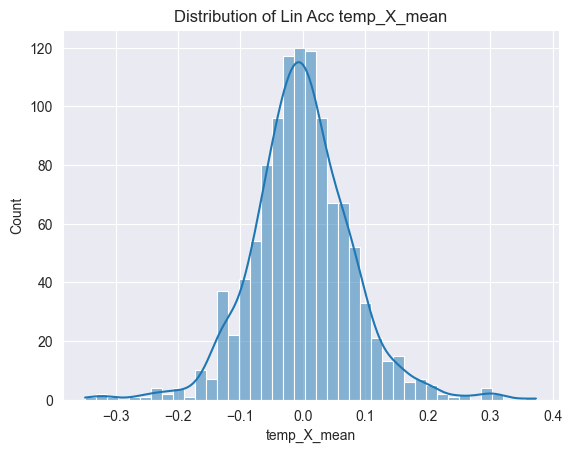

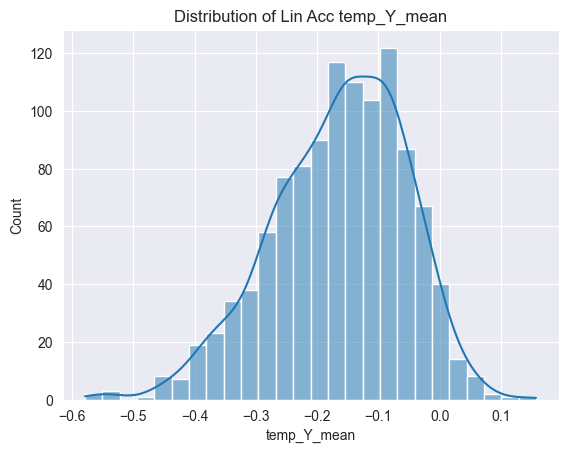

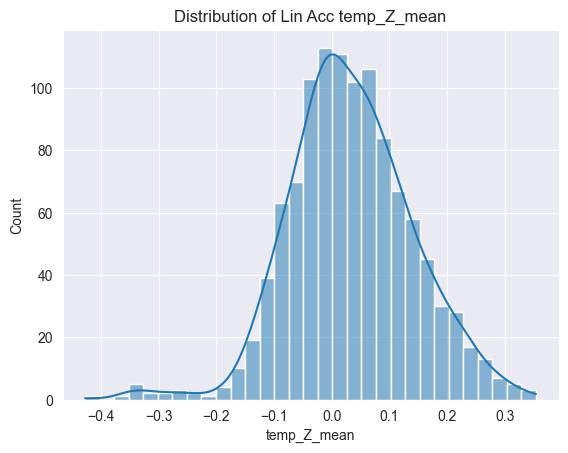

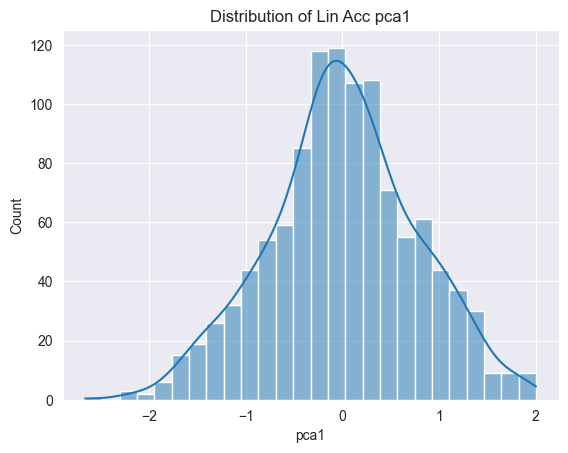

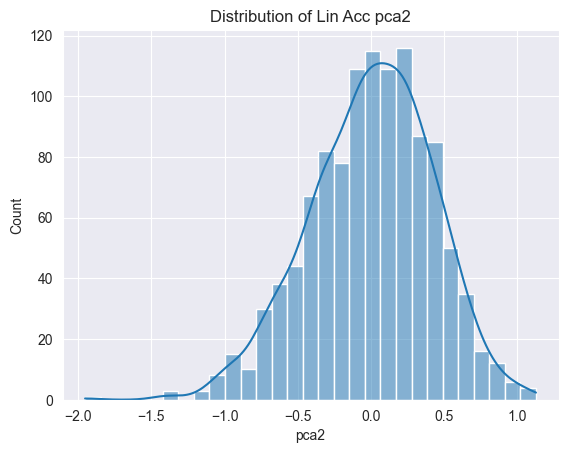

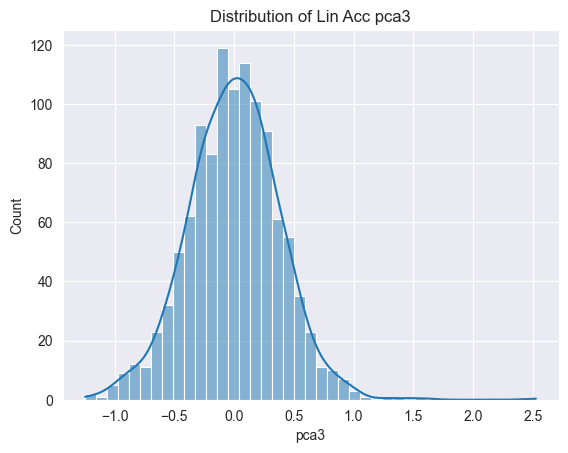

In [56]:
# Plot histograms for statistical features
for col in ['temp_X_mean', 'temp_Y_mean', 'temp_Z_mean']:
    sns.histplot(df_lin_acc[col], kde=True)
    plt.title(f'Distribution of Lin Acc {col}')
    plt.show()

# Plot histograms for PCA features
for col in pca_columns:
    sns.histplot(df_lin_acc[col], kde=True)
    plt.title(f'Distribution of Lin Acc {col}')
    plt.show()


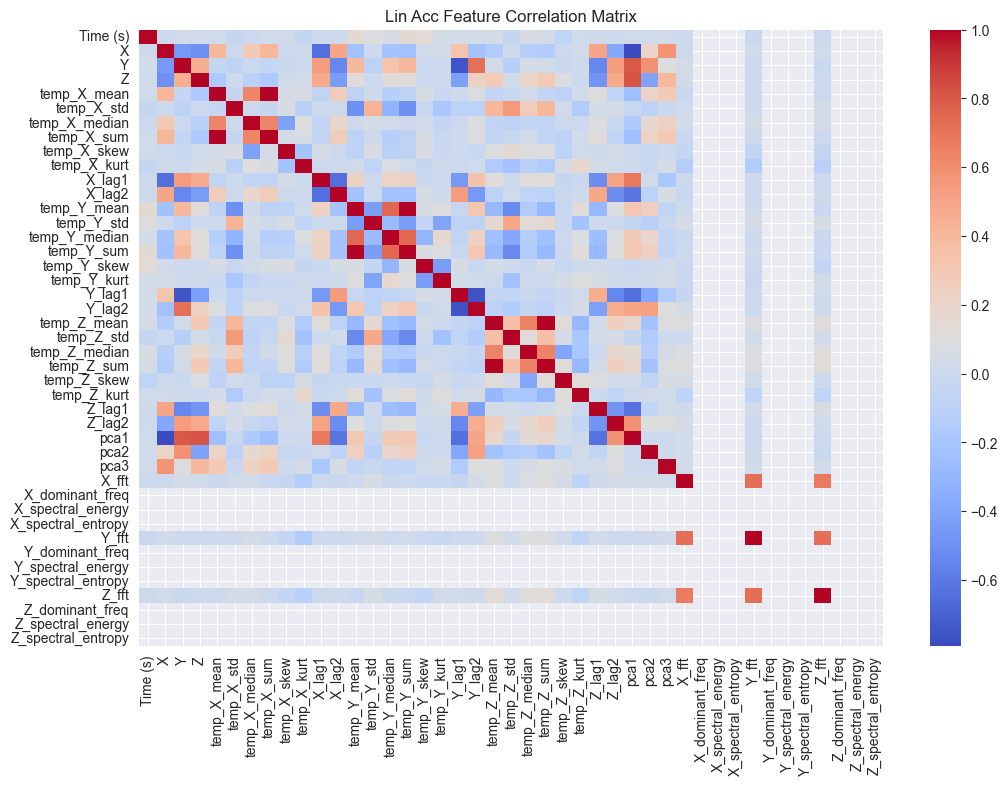

In [57]:
corr_matrix = df_lin_acc.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='coolwarm')
plt.title('Lin Acc Feature Correlation Matrix')
plt.show()


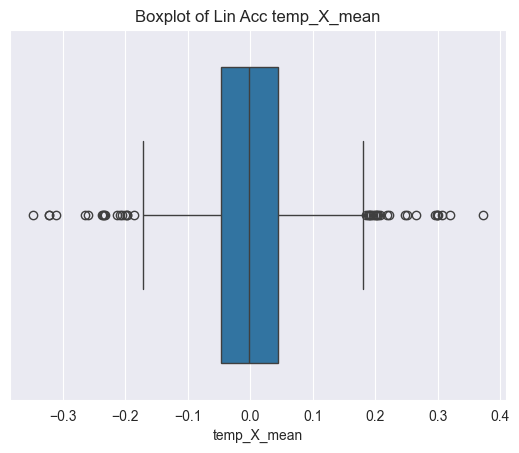

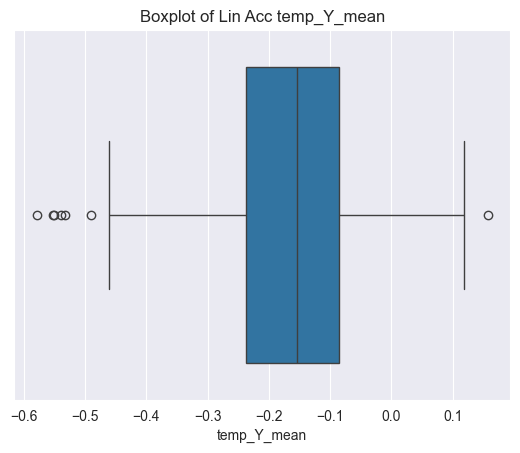

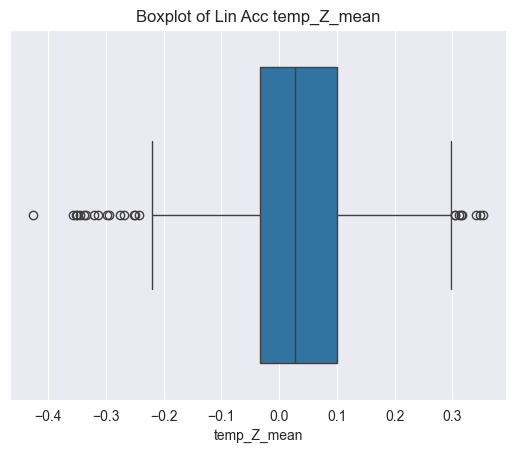

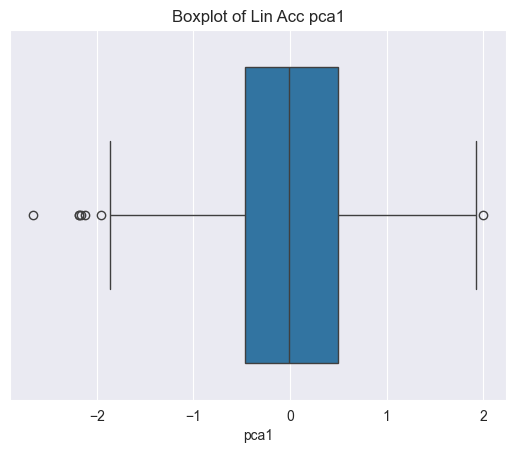

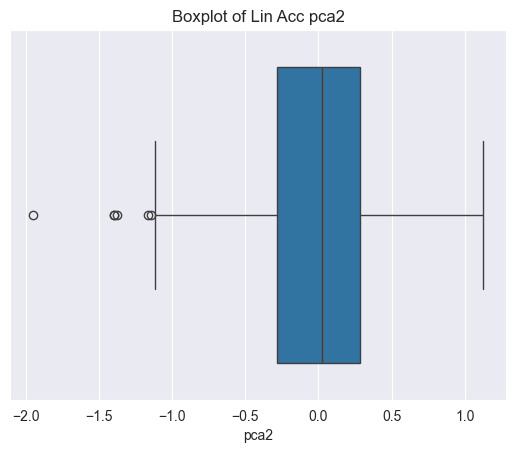

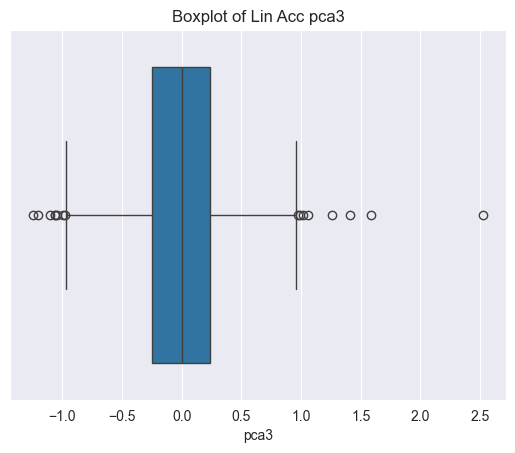

In [58]:
# Boxplots for statistical features
for col in ['temp_X_mean', 'temp_Y_mean', 'temp_Z_mean']:
    sns.boxplot(x=df_lin_acc[col])
    plt.title(f'Boxplot of Lin Acc {col}')
    plt.show()

# Boxplots for PCA features
for col in pca_columns:
    sns.boxplot(x=df_lin_acc[col])
    plt.title(f'Boxplot of Lin Acc {col}')
    plt.show()


<Figure size 1200x600 with 0 Axes>

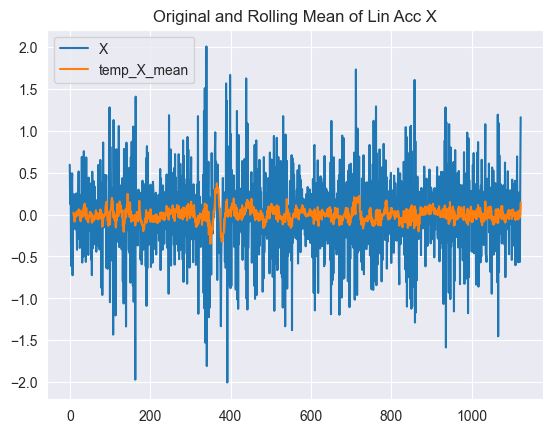

<Figure size 1200x600 with 0 Axes>

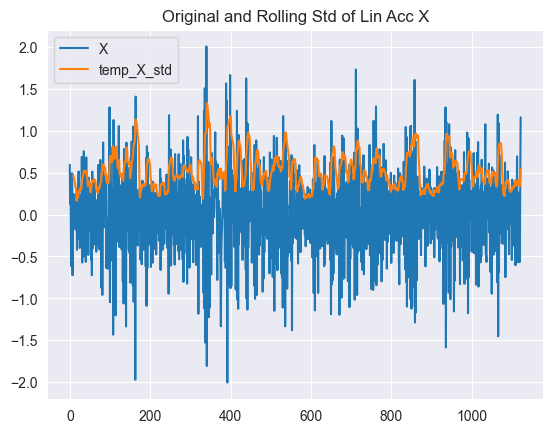

In [59]:
# Plotting time series with rolling mean
plt.figure(figsize=(12, 6))
df_lin_acc[['X', 'temp_X_mean']].plot()
plt.title('Original and Rolling Mean of Lin Acc X')
plt.show()

# Plotting time series with rolling std
plt.figure(figsize=(12, 6))
df_lin_acc[['X', 'temp_X_std']].plot()
plt.title('Original and Rolling Std of Lin Acc X')
plt.show()


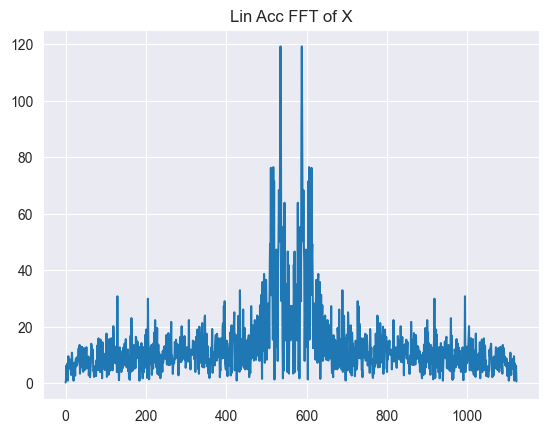

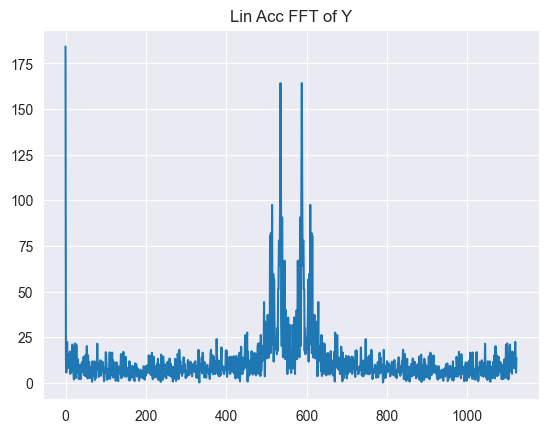

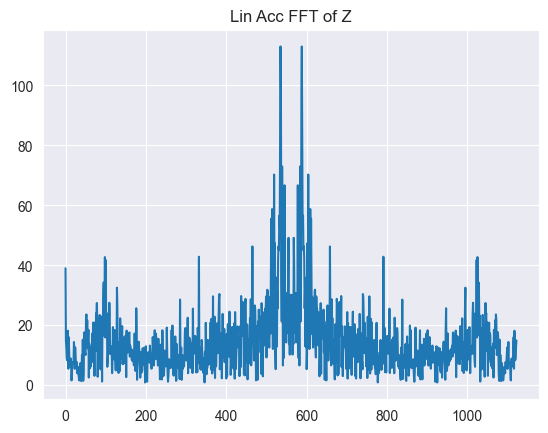

In [60]:
# Frequency domain plots
for col in ['X_fft', 'Y_fft', 'Z_fft']:
    plt.plot(df_lin_acc[col])
    plt.title(f'Lin Acc FFT of {col.split("_")[0]}')
    plt.show()


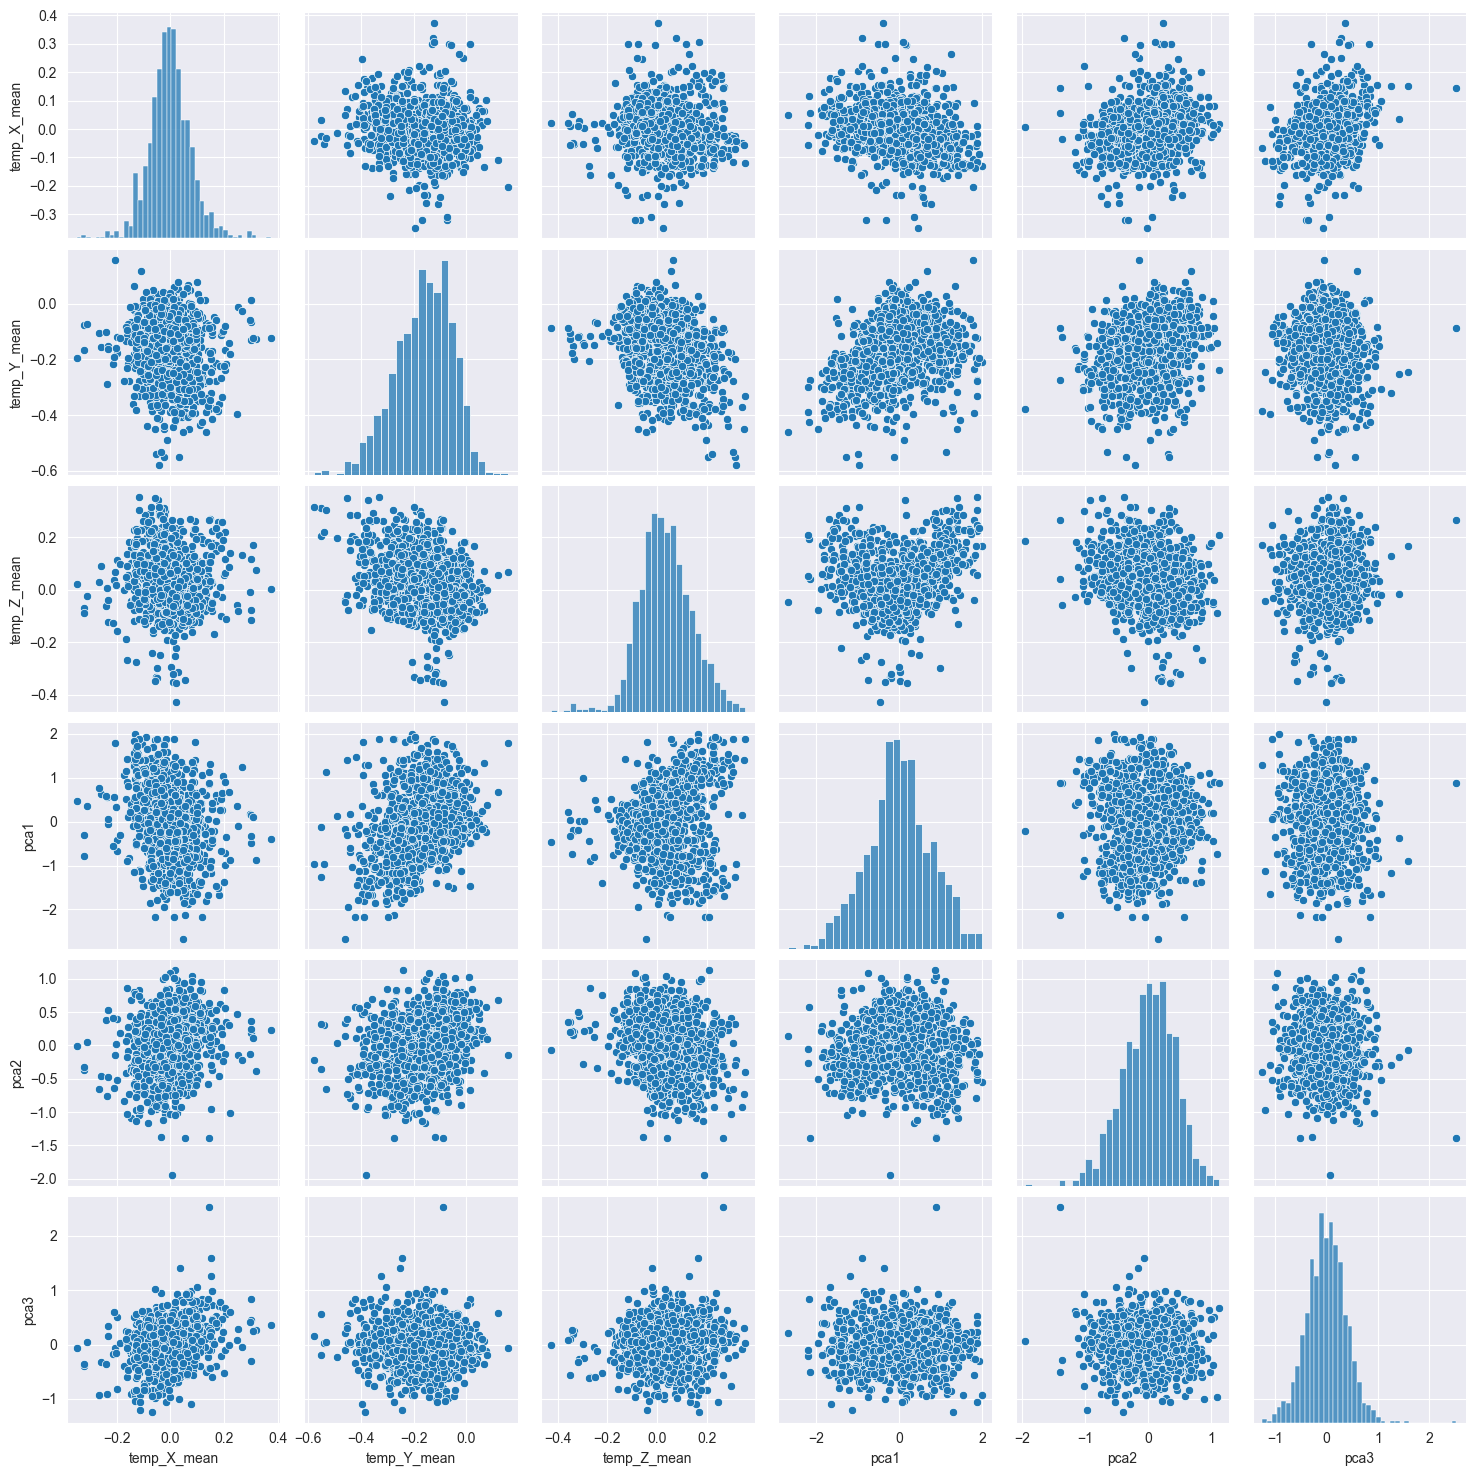

In [61]:
pair_columns = ['temp_X_mean', 'temp_Y_mean', 'temp_Z_mean'] + list(pca_columns)
sns.pairplot(df_lin_acc[pair_columns])
plt.show()


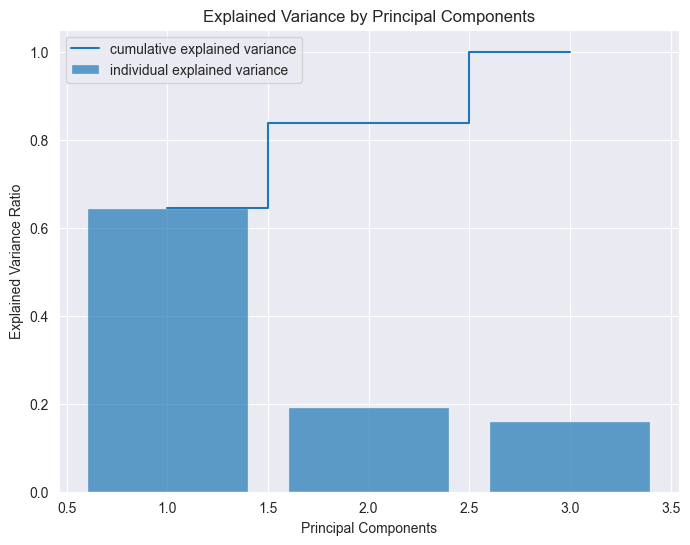

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(df_lin_acc[['X', 'Y', 'Z']])
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, 4), explained_variance, alpha=0.7, align='center', label='individual explained variance')
plt.step(range(1, 4), np.cumsum(explained_variance), where='mid', label='cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()


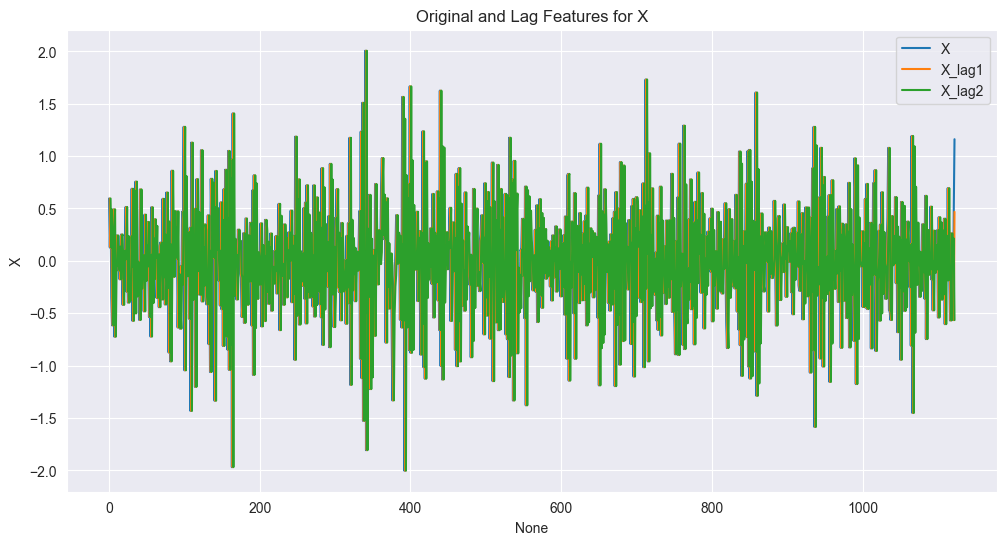

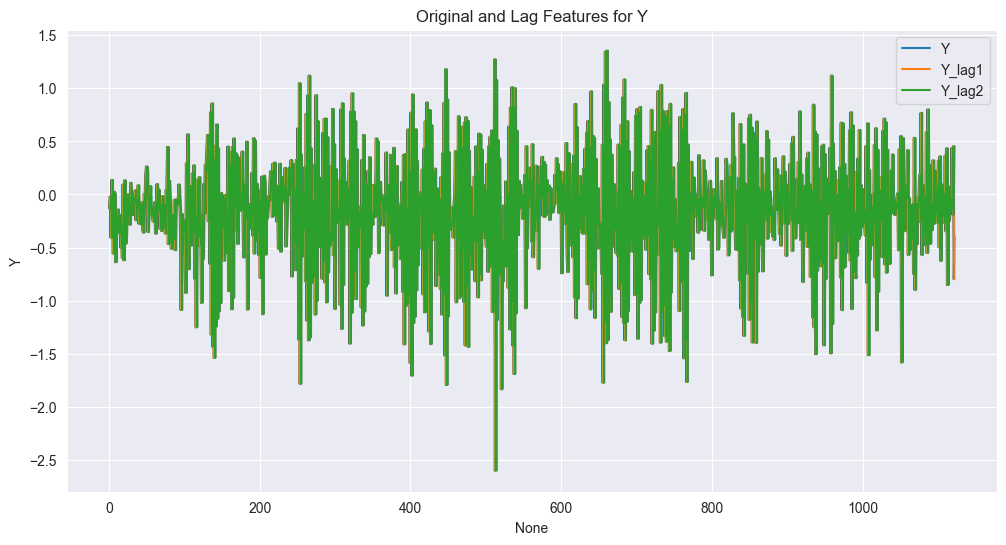

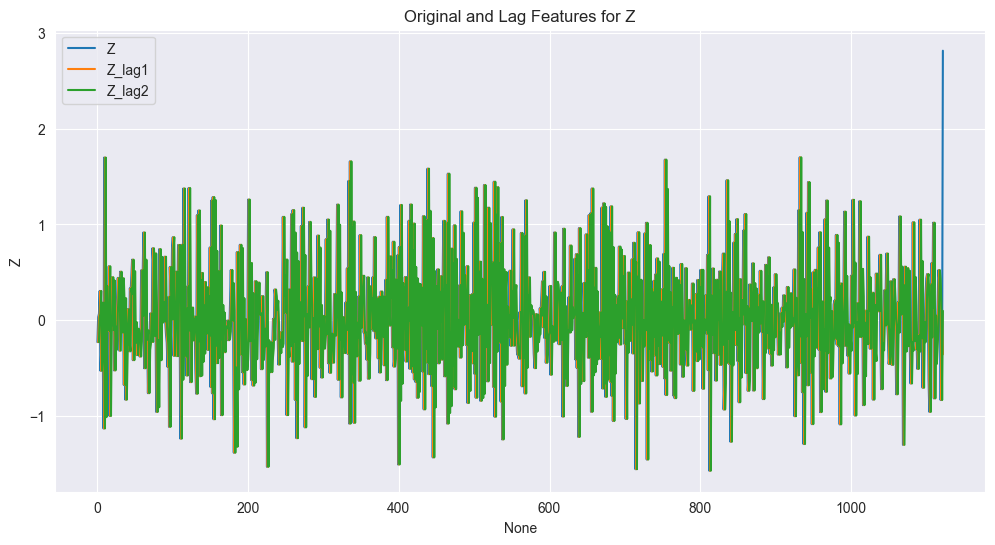

In [63]:
# Lag feature plots
for ax in ['X', 'Y', 'Z']:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_lin_acc, x=df_lin_acc.index, y=ax, label=ax)
    sns.lineplot(data=df_lin_acc, x=df_lin_acc.index, y=f'{ax}_lag1', label=f'{ax}_lag1')
    sns.lineplot(data=df_lin_acc, x=df_lin_acc.index, y=f'{ax}_lag2', label=f'{ax}_lag2')
    plt.title(f'Original and Lag Features for {ax}')
    plt.legend()
    plt.show()
